# skills
To determine the correct skill system this script is being used to compare the different effects of dice values and tool modifier.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from random import randrange
import time
np.set_printoptions(suppress=True)

## skill roll
The following script shows the propability of rolling the different dice values for any choosen die type.

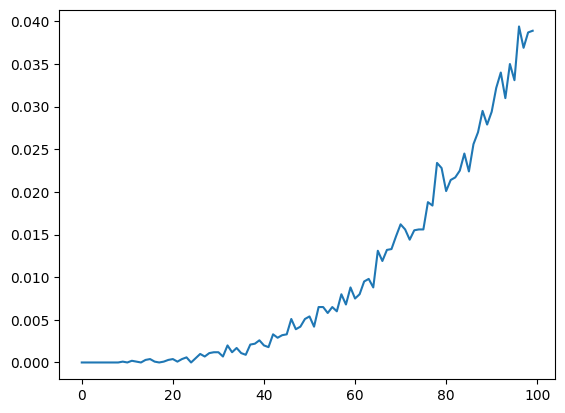

In [55]:
rolls = 10000

def skillroll(level, dicetype):
    check = np.zeros(dicetype)

    for i in range(rolls):
        highestValue = 0

        for j in range(level):
            roll = randrange(dicetype)
            if(roll>highestValue):
                highestValue = roll
                
        check[highestValue] = check[highestValue]+1

    #returning percentiles
    plt.plot(check/rolls)

#Skill roll testing
skillroll(level=4, dicetype=100)

## skill check
Here the propability of a succieded skill check can be determined. The level of the player as well as the level of the action itself and a bonus from using a tool can be taken into account for balancing reasons.

In [54]:
rolls = 10000

def skillCheckPropability(levelPlayer, levelDM, toolModifier, dicetype):
    checks = np.zeros(2) #losses first, wins second

    for i in range(rolls):
        highestPlayer = 0
        highestDM = 0

        for j in range(levelPlayer):
            rollPlayer = randrange(dicetype)
            if(rollPlayer>highestPlayer):
                highestPlayer = rollPlayer

        for j in range(levelDM):
            rollDM = randrange(dicetype)
            if(rollDM>highestDM):
                highestDM = rollDM

        if(highestDM>=highestPlayer+toolModifier):
            checks[0] = checks[0]+1;
        else:
            checks[1] = checks[1]+1;

    #returning percentiles
    print("Propability of failing: " + str(checks[0]/rolls*100) + "%")
    print("Propability of succeeding: " + str(checks[1]/rolls*100) + "%")

#Skill check testing
skillCheckPropability(levelPlayer=1, levelDM=5, toolModifier=20, dicetype=100)

Propability of failing: 64.07000000000001%
Propability of succeeding: 35.93%


## Propability of rolling a double

In [40]:
doubleRolls = 1000000

def rollDoublesPropability(dicetype):
    doubles = 0

    for i in range(doubleRolls):
        roll1 = randrange(dicetype)
        roll2 = randrange(dicetype)

        if(roll1 == roll2):
            doubles += 1

    print("Probabilty of rolling a double: " + str(doubles/doubleRolls*100) + "%")

rollDoublesPropability(dicetype=10)

Probabilty of rolling a double: 9.9839%
